In [28]:
!pip install pandas

In [2]:
import pandas as pd

In [3]:
# loading sample data from colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/california_housing_train.csv')

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


In [9]:
df.shape

(17000, 9)

In [10]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [11]:
df.value_counts()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  population  households  median_income  median_house_value
-114.31    34.19     15.0                5612.0       1283.0          1015.0      472.0       1.4936         66900.0               1
-124.35    40.54     52.0                1820.0       300.0           806.0       270.0       3.0147         94600.0               1
-124.30    41.80     19.0                2672.0       552.0           1298.0      478.0       1.9797         85800.0               1
           41.84     17.0                2677.0       531.0           1244.0      456.0       3.0313         103600.0              1
-124.27    40.69     36.0                2349.0       528.0           1194.0      465.0       2.5179         79000.0               1
                                                                                                                                  ..
-124.21    41.77     17.0                3461.0       722.0           1947.0      647.0       2.5795         68400.0               1
           41.75     20.0                3810.0       787.0           1993.0      721.0       2.0074         66900.0               1
           40.75     32.0                1218.0       331.0           620.0       268.0       1.6528         58100.0               1
-124.22    41.73     28.0                3003.0       699.0           1530.0      653.0       1.7038         78300.0               1
-124.23    41.75     11.0                3159.0       616.0           1343.0      479.0       2.4805         73200.0               1
Name: count, Length: 17000, dtype: int64

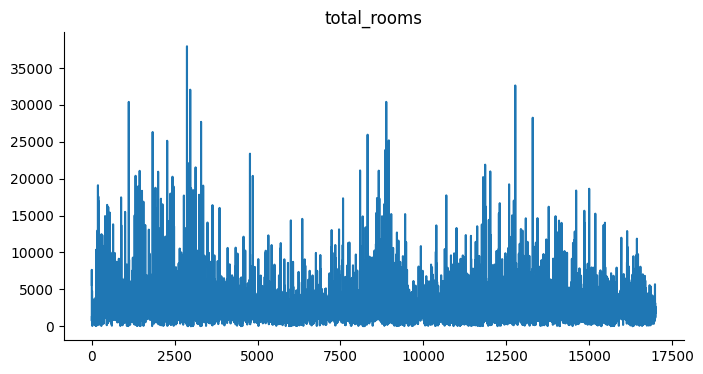

In [5]:
# @title total_rooms

from matplotlib import pyplot as plt
df['total_rooms'].plot(kind='line', figsize=(8, 4), title='total_rooms')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
# converting a dataframe into g_sheet
from google.colab import sheets
sheet = sheets.InteractiveSheet(df=df)

https://docs.google.com/spreadsheets/d/1zCRCCQ3fqqZCH7XU1GudYj6GRlrAoOmD6uQ1ciwEotI/edit#gid=0


In [6]:
!ls

drive  sample_data


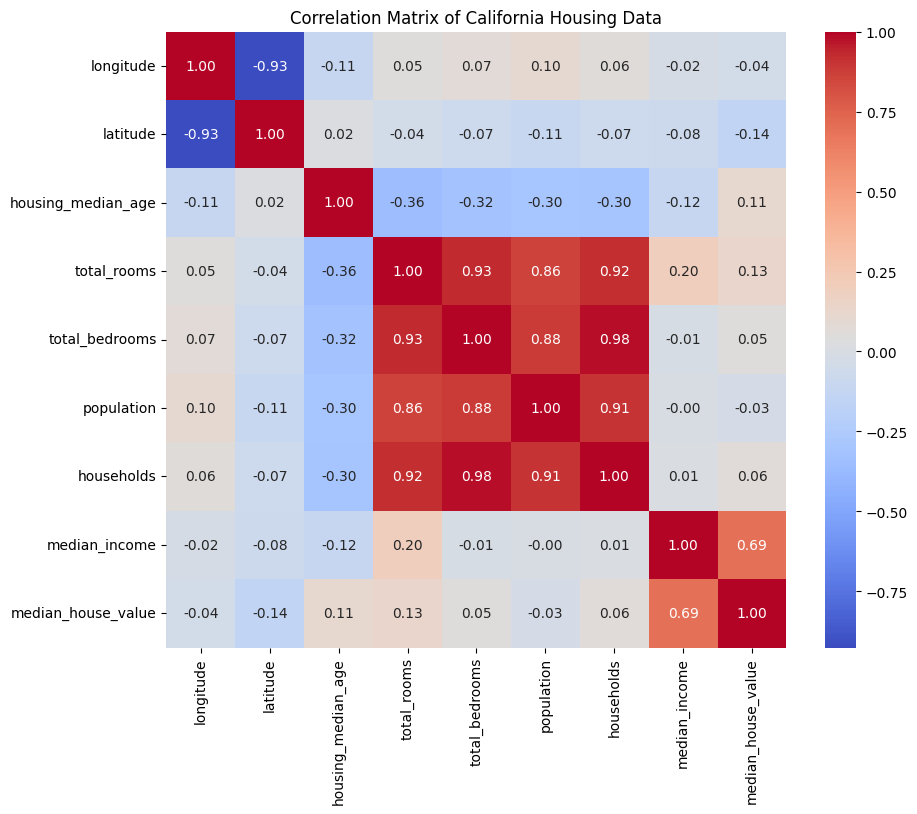

In [7]:
# finding a correlation between each columns in dataset
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of California Housing Data')
plt.show()

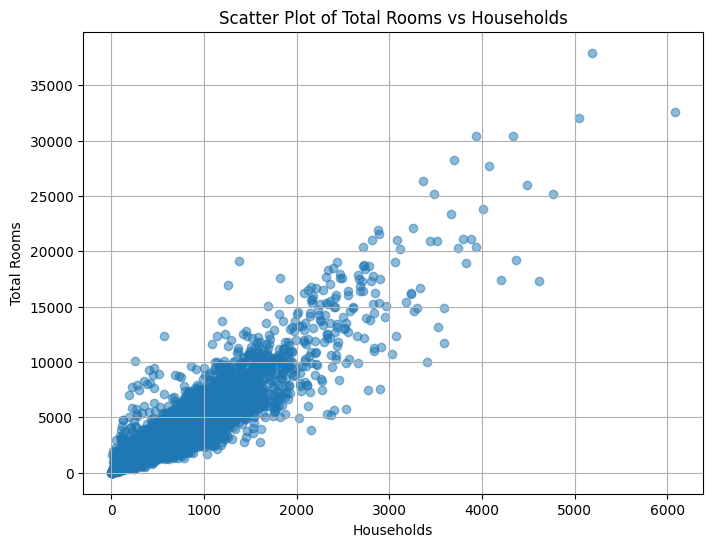

In [12]:
import matplotlib.pyplot as plt

# Scatter plot for households vs total_rooms
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['total_rooms'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Total Rooms')
plt.title('Scatter Plot of Total Rooms vs Households')
plt.grid(True)
plt.show()


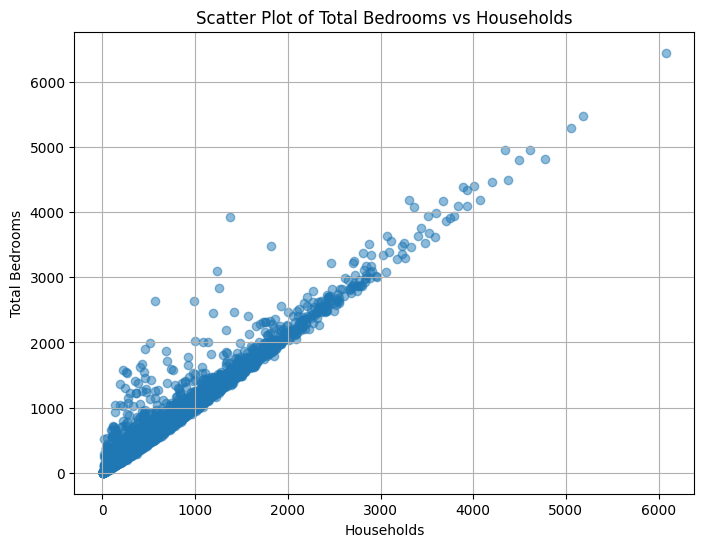

In [13]:
# Scatter plot for households vs total_bedrooms
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['total_bedrooms'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Total Bedrooms')
plt.title('Scatter Plot of Total Bedrooms vs Households')
plt.grid(True)
plt.show()


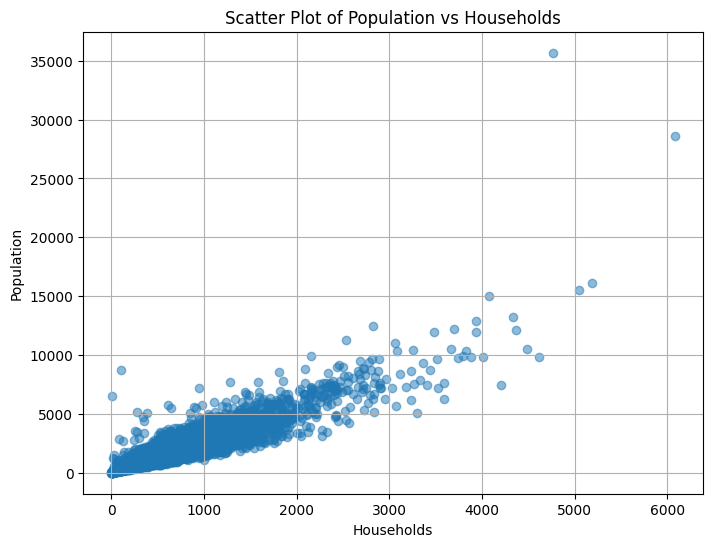

In [14]:
# Scatter plot for households vs population
plt.figure(figsize=(8, 6))
plt.scatter(df['households'], df['population'], alpha=0.5)
plt.xlabel('Households')
plt.ylabel('Population')
plt.title('Scatter Plot of Population vs Households')
plt.grid(True)
plt.show()

In [15]:
# finding outliers
from scipy.stats import zscore
import numpy as np

# Calculate Z-scores for numerical columns
# We'll exclude 'ocean_proximity' as it's not numerical
numerical_cols = df.select_dtypes(include=np.number).columns
z_scores = df[numerical_cols].apply(zscore)

# Define a threshold for identifying outliers
threshold = 3

# Find rows where any numerical column has a Z-score above the threshold
outlier_rows_zscore = df[(np.abs(z_scores) > threshold).any(axis=1)]

print(f"Number of potential outliers found using Z-score (threshold={threshold}): {len(outlier_rows_zscore)}")
print("\nPotential outlier rows (based on Z-score):")
display(outlier_rows_zscore)

Number of potential outliers found using Z-score (threshold=3): 743

Potential outlier rows (based on Z-score):


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
133,-116.06,34.15,15.0,10377.0,2331.0,4507.0,1807.0,2.2466,66800.0
135,-116.09,34.15,13.0,9444.0,1997.0,4166.0,1482.0,2.6111,65600.0
165,-116.23,33.71,17.0,4874.0,1349.0,5032.0,1243.0,2.4440,90000.0
168,-116.24,33.71,10.0,9033.0,2224.0,5525.0,1845.0,2.7598,95000.0
...,...,...,...,...,...,...,...,...,...
16419,-122.56,37.94,36.0,2023.0,242.0,653.0,241.0,10.6272,500001.0
16429,-122.57,38.02,33.0,9531.0,1487.0,3798.0,1409.0,5.6512,314000.0
16441,-122.58,38.10,22.0,11872.0,2300.0,5600.0,2200.0,4.6463,276300.0
16442,-122.58,38.08,27.0,10839.0,1637.0,4406.0,1623.0,5.6150,285600.0


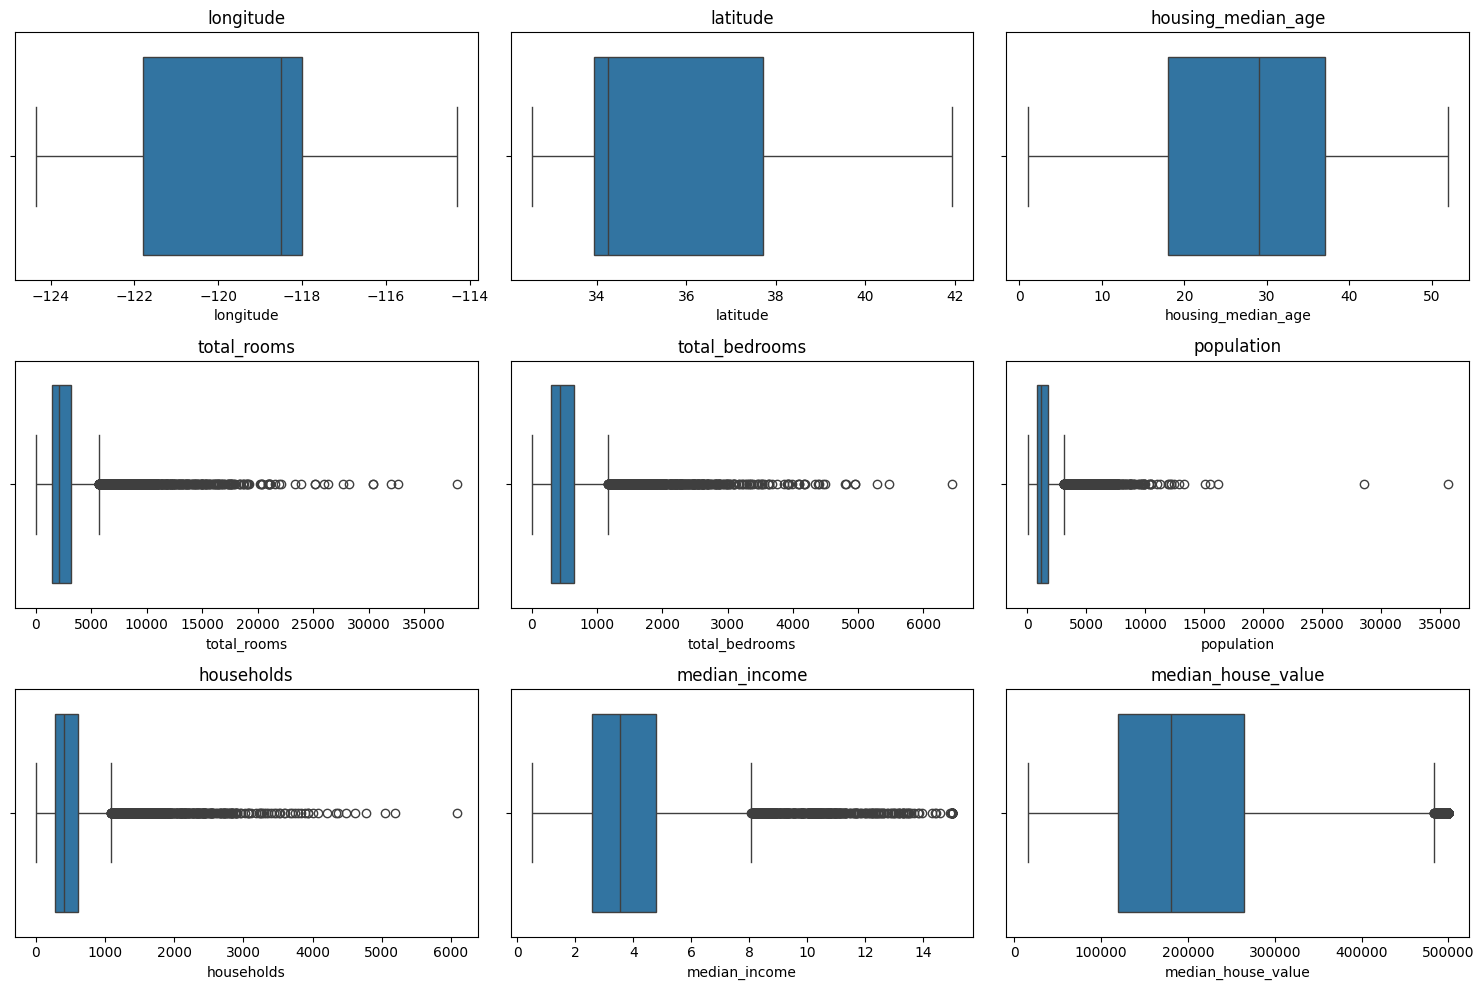

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select numerical columns for box plots
numerical_cols = df.select_dtypes(include=np.number).columns

# Create box plots for each numerical column
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)  # Adjust subplot grid as needed
    sns.boxplot(x=df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Datasets/california_housing_test.csv')

In [18]:
df_test.shape

(3000, 9)

## Perform the hyperparameter search

### Subtask:
Perform the hyperparameter search using GridSearchCV to find the best hyperparameters for the Random Forest Regressor model on the training data.


In [19]:
# Define features (X) and target (y) for the training data
X_train = df.drop('median_house_value', axis=1)  # Features are all columns except the target
y_train = df['median_house_value']  # Target variable is 'median_house_value'

# Define features (X) and target (y) for the testing data
X_test = df_test.drop('median_house_value', axis=1)  # Features are all columns except the target
y_test = df_test['median_house_value']  # Target variable is 'median_house_value'

print("Data preparation complete.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data preparation complete.
Shape of X_train: (17000, 8)
Shape of X_test: (3000, 8)
Shape of y_train: (17000,)
Shape of y_test: (3000,)


## Train the Random Forest Regressor

### Subtask:
Initialize and train the Random Forest Regressor model using the training data.

In [20]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest Regressor model
# You can adjust parameters like n_estimators (number of trees)
model = RandomForestRegressor(n_estimators=100, random_state=22)

# Train the model using the training data
model.fit(X_train, y_train)

print("Random Forest Regressor model training complete.")

Random Forest Regressor model training complete.


## Evaluate the model

### Subtask:
Make predictions on the test set and evaluate the model's performance using a suitable metric, like Root Mean Squared Error (RMSE).

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Calculate the Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)

# Calculate the R-squared (R2) score
r2 = r2_score(y_test, y_pred)


print(f"Root Mean Squared Error (RMSE) on the test set: {rmse:.2f}")
print(f"Mean Absolute Error (MAE) on the test set: {mae:.2f}")
print(f"R-squared (R2) score on the test set: {r2:.2f}")

Root Mean Squared Error (RMSE) on the test set: 49291.47
Mean Absolute Error (MAE) on the test set: 32123.39
R-squared (R2) score on the test set: 0.81


In [23]:
import pandas as pd

# Create a DataFrame to compare actual and predicted values
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate the difference (error)
comparison_df['Difference'] = comparison_df['Actual'] - comparison_df['Predicted']

# Display the comparison DataFrame
display(comparison_df.head())

# You can also display the absolute difference or squared difference
comparison_df['Absolute_Difference'] = np.abs(comparison_df['Difference'])
comparison_df['Squared_Difference'] = comparison_df['Difference']**2

display(comparison_df.head())

# You can also sort by the absolute difference to see where the largest errors occur
display(comparison_df.sort_values(by='Absolute_Difference', ascending=False).head())

,Actual,Predicted,Difference
0,344700.0,409009.15,-64309.15
1,176500.0,216178.00,-39678.00
2,270500.0,257107.01,13392.99
3,330000.0,322694.09,7305.91
4,81700.0,80180.00,1520.00


,Actual,Predicted,Difference,Absolute_Difference,Squared_Difference
0,344700.0,409009.15,-64309.15,64309.15,4.135667e+09
1,176500.0,216178.00,-39678.00,39678.00,1.574344e+09
2,270500.0,257107.01,13392.99,13392.99,1.793722e+08
3,330000.0,322694.09,7305.91,7305.91,5.337632e+07
4,81700.0,80180.00,1520.00,1520.00,2.310400e+06


,Actual,Predicted,Difference,Absolute_Difference,Squared_Difference
185,500001.0,169423.00,330578.00,330578.00,1.092818e+11
2194,475000.0,145030.00,329970.00,329970.00,1.088802e+11
2596,450000.0,155795.02,294204.98,294204.98,8.655657e+10
1886,500001.0,206445.03,293555.97,293555.97,8.617511e+10
2555,40000.0,328023.01,-288023.01,288023.01,8.295725e+10


# Here's a summary of what we did:

1. We loaded the California housing dataset.
2. We split the data into training and testing sets.
3. We trained an initial Random Forest Regressor model and evaluated its performance using RMSE, which was approximately 49291.47, MAE which was approximately 32123.39, and R2 score which was approximately 0.81.
4. We compared the actual and predicted housing values to see the differences.


# Additioinal Task if you want to try, give it a try!
Tune the hyperparameters of the Random Forest Regressor model using GridSearchCV or RandomizedSearchCV to improve its performance on the California Housing dataset.